### 1. Start a ChatBot session to understand what a *Classification Decision Tree* is: (a) ask the ChatBot to describe the type of problem a *Classification Decision Tree* addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a *Classification Decision Tree* makes *(classification) predictions* versus how *Multiple Linear Regression* makes *(regression) predictions*<br>

(a) A Classification Decision Tree is a supervised machine learning algorithm used for solving classification problems. The goal of these problems is to predict a categorical outcome (class label) based on input features. The decision tree models decisions and their possible consequences, forming a tree-like structure that is easy to interpret.

**Real-World Applications:**
1. Medical Diagnosis: Predicting whether a tumor is benign or malignant based on features like size, shape, and cell density.
2. Fraud Detection: Classifying transactions as fraudulent or legitimate by analyzing transaction history and user behavior.
3. Customer Segmentation: Grouping customers into categories such as high, medium, or low value based on purchasing patterns.
4. Credit Scoring: Assessing the risk level of loan applicants by predicting whether they are likely to default.
5. Employee Attrition: Predicting whether an employee is likely to leave a company based on job satisfaction, salary, and workload.

(b) **Classification Decision Trees:** Used for classification tasks where the output variable is categorical (e.g., yes/no, spam/not spam).

**Multiple Linear Regression:** Used for regression tasks where the output variable is continuous (e.g., predicting sales revenue, temperature).
- **Differences:**
- **Output Type:**
*Decision Trees:* Produce discrete class labels.
*Linear Regression:* Produces continuous numerical values.
- **Decision Process:**
*Decision Trees:* Use a series of if-else conditions to partition the data.
*Linear Regression:* Uses a mathematical equation to model the relationship.
- **Interpretability:**
*Decision Trees:* Easy to interpret visually; you can follow the path to a prediction.
*Linear Regression:* Coefficients indicate the strength and direction of the relationship between features and the target.
- **Handling Non-Linearity:**
*Decision Trees:* Can capture non-linear relationships by partitioning the feature space.
*Linear Regression:* Assumes a linear relationship between features and the target.

### 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following *metrics* below: provide your answers and, in your own words, *concisely explain your rationale for your answers.*<br>

1. **Accuracy** measures the proportion of true results (both true positives and true negatives) in the population.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

**Application Scenario: Quality Control in Manufacturing**

**Example:** Detecting defective products on an assembly line (e.g., sorting good vs. defective items).

**Rationale:**
- **Balanced Importance of Errors:** In quality control, both false positives (classifying a good product as defective) and false negatives (missing a defective product) are undesirable but may have similar costs.
- **Overall Performance Measure:** Accuracy is suitable here because it considers both true positives and true negatives, providing a general measure of how well the system is performing.
- **Balanced Classes:** If the number of defective and non-defective products is relatively balanced, accuracy becomes a reliable metric.

2. **Sensitivity** measures the proportion of actual positives that are correctly identified.

$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

**Application Scenario: Medical Disease Screening**

**Example:** Screening for a contagious disease like COVID-19 in a population.

**Rationale:**

- **Critical to Identify All Positive Cases:** Missing a true positive (false negative) means a person with the disease goes untreated and may infect others.
- **High Stakes for False Negatives:** The cost of not identifying someone who is actually positive is much higher than incorrectly flagging someone who is negative.
- **Prioritizing Detection Over Specificity:** In initial screenings, it's more important to catch all potential cases, even if it means having some false alarms.

3. **Specificity** measures the proportion of actual negatives that are correctly identified.

$$\text{Specificity} = \frac{TN}{TN + FP}$$

**Application Scenario: Confirmatory Medical Testing**

**Example:** Confirming a diagnosis of a serious disease before an invasive procedure or treatment.

**Rationale:**
- **Avoiding False Positives:** A false positive could lead to unnecessary stress, additional tests, or harmful treatments for a patient who is actually healthy.
- **High Stakes for False Positives:** The cost and risk associated with unnecessary procedures make it crucial to ensure that those identified as positive truly have the condition.
- **Confirmatory Stage:** After initial screening (where sensitivity is prioritized), specificity becomes key to confirm true negatives and reduce unnecessary interventions.

4. **Precision** measures the proportion of positive identifications that were actually correct.

$$\text{Precision} = \frac{TP}{TP + FP}$$

**Application Scenario: Spam Email Filtering**

**Example:** Identifying and filtering out spam emails from a user's inbox.

**Rationale:**
- **Importance of Correct Positive Predictions:** Users don't want important emails to be mislabeled as spam (false positives).
- **Reducing False Positives:** High precision ensures that when the system flags an email as spam, it's very likely to be spam, minimizing the chance of losing legitimate emails.
- **User Experience:** Misclassified emails can lead to missed opportunities or critical information, so precision is crucial to maintain trust in the email system.

### 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard *exploratory data analysis (EDA)* and data summarization after pre-processing the dataset to meet the requirements below<br>

In [7]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Convert data types using .loc to avoid SettingWithCopyWarning
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the first few rows of the cleaned dataset
print("Cleaned Dataset Preview:")
print(ab_reduced_noNaN.head())

# Display summary statistics
print("\nSummary Statistics:")
print(ab_reduced_noNaN.describe())

# Display data type information
print("\nData Types:")
print(ab_reduced_noNaN.dtypes)

# Check for unique values in the 'Hard_or_Paper' category column
print("\nUnique values in 'Hard_or_Paper':", ab_reduced_noNaN['Hard_or_Paper'].unique())

Cleaned Dataset Preview:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Thick  
0    2010.0  1605506249    0.8  
1    2008.0  141656

### 4. Create an 80/20 split with 80% of the data as a training set *ab_reduced_noNaN_train* and 20% of the data testing set  *ab_reduced_noNaN_test* using either *df.sample(...)* as done in TUT or using *train_test_split(...)* as done in the previous HW, and report on how many observations there are in the training data set and the test data set.<br><br>Tell a ChatBot that you are about to fit a "scikit-learn" *DecisionTreeClassifier* model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree *clf* using only the *List Price* variable to predict whether or not a book is a hard cover or paper back book using a *max_depth* of *2*; finally use *tree.plot_tree(clf)* to explain what *predictions* are made based on *List Price* for the fitted *clf* model

Cleaned Dataset Preview:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Thick  
0    2010.0  1605506249    0.8  
1    2008.0  141656

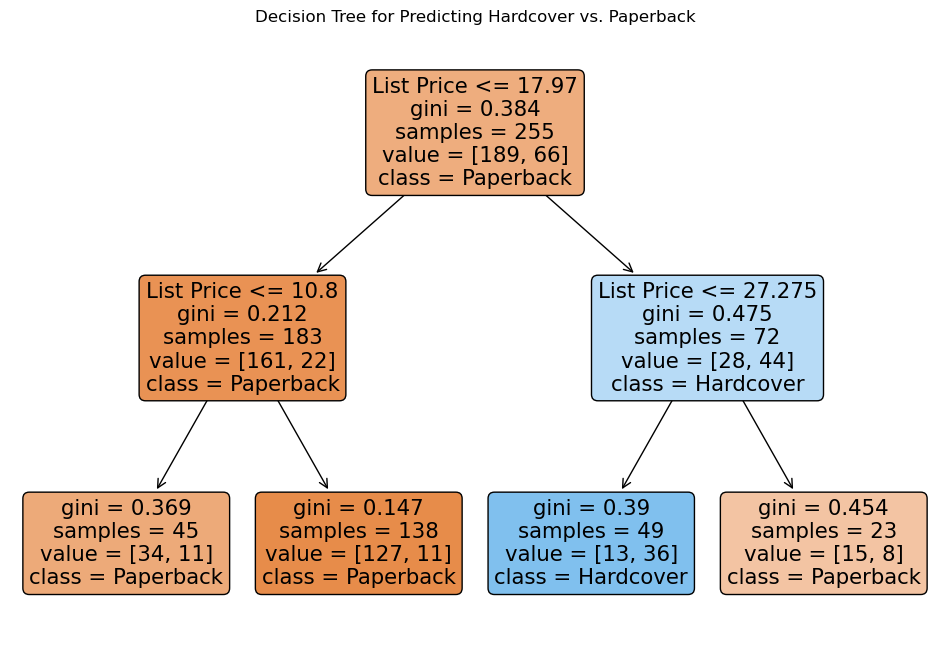

Accuracy on the test set: 0.84

Confusion Matrix:
[[40  4]
 [ 6 14]]

Classification Report:
              precision    recall  f1-score   support

   Paperback       0.87      0.91      0.89        44
   Hardcover       0.78      0.70      0.74        20

    accuracy                           0.84        64
   macro avg       0.82      0.80      0.81        64
weighted avg       0.84      0.84      0.84        64



In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Convert data types using .loc to avoid SettingWithCopyWarning
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the first few rows of the cleaned dataset
print("Cleaned Dataset Preview:")
print(ab_reduced_noNaN.head())

# Create the 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations
print(f"\nNumber of observations in the training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the test set: {len(ab_reduced_noNaN_test)}")

# Prepare the target variable and feature for training data
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train = ab_reduced_noNaN_train[['List Price']]

# Prepare the target variable and feature for testing data
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']
X_test = ab_reduced_noNaN_test[['List Price']]

# Initialize the Decision Tree Classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=['List Price'],
    class_names=['Paperback', 'Hardcover'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Predicting Hardcover vs. Paperback")
plt.show()

# Predict on the test data
y_pred = clf.predict(X_test)

# Import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Paperback', 'Hardcover']))


### 5. Repeat the previous problem but this time visualize the *classification decision tree* based on the following specifications below; then explain generally how predictions are made for the *clf2* model<br>

Cleaned Dataset Preview:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Thick  
0    2010.0  1605506249    0.8  
1    2008.0  141656

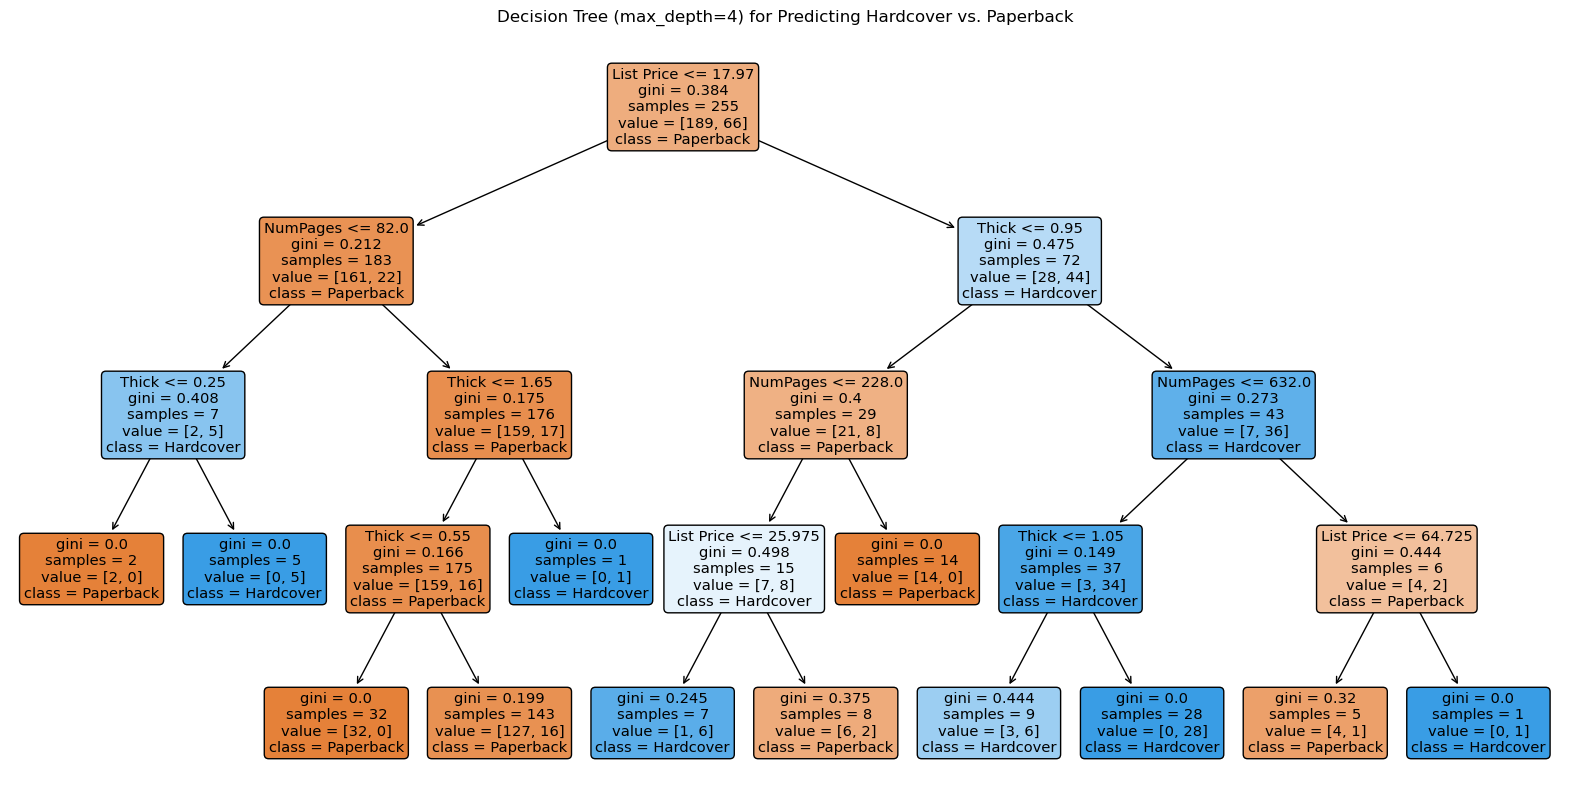

Accuracy on the test set: 0.86

Confusion Matrix:
[[40  4]
 [ 5 15]]

Classification Report:
              precision    recall  f1-score   support

   Paperback       0.89      0.91      0.90        44
   Hardcover       0.79      0.75      0.77        20

    accuracy                           0.86        64
   macro avg       0.84      0.83      0.83        64
weighted avg       0.86      0.86      0.86        64


Feature Importances:
List Price    0.485974
Thick         0.297490
NumPages      0.216537
dtype: float64


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Convert data types using .loc to avoid SettingWithCopyWarning
ab_reduced_noNaN = ab_reduced_noNaN.copy()  # Ensure we're working with a copy
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the first few rows of the cleaned dataset
print("Cleaned Dataset Preview:")
print(ab_reduced_noNaN.head())

# Create the 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations
print(f"\nNumber of observations in the training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the test set: {len(ab_reduced_noNaN_test)}")

# Prepare the target variable for training and testing
# Convert 'Hard_or_Paper' into binary format where 'H' is 1 and 'P' is 0
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Prepare the feature variables for training and testing
X_train = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Initialize the Decision Tree Classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier on the training data
clf2.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paperback', 'Hardcover'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree (max_depth=4) for Predicting Hardcover vs. Paperback")
plt.show()

# Predict on the test data
y_pred = clf2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Paperback', 'Hardcover']))

# Feature importances
feature_importances = pd.Series(clf2.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print("\nFeature Importances:")
print(feature_importances)


### 6. Use previously created *ab_reduced_noNaN_test* to create confusion matrices for *clf* and *clf2*. Report the sensitivity, specificity and accuracy for each of the models<br>

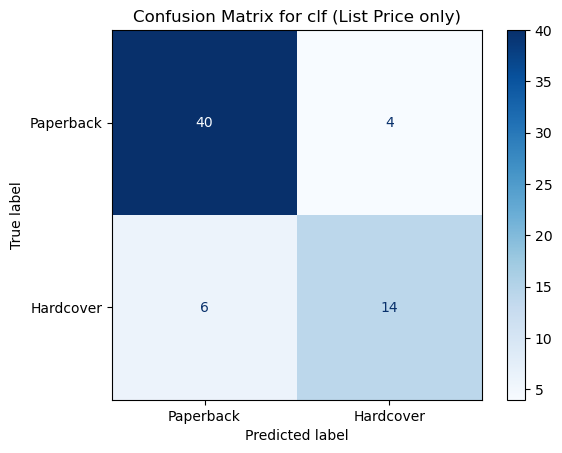

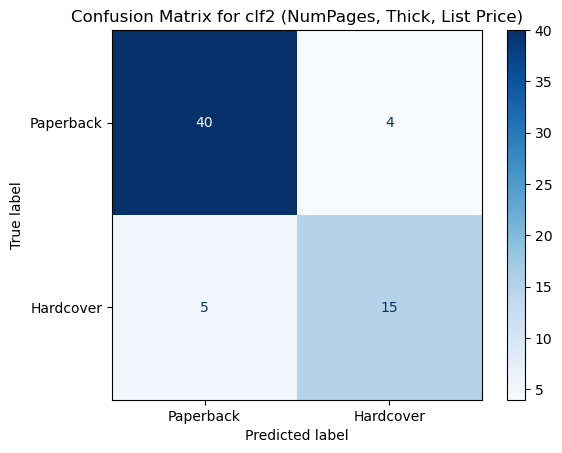

Metrics for clf (List Price only):
Sensitivity (Recall): 0.70
Specificity: 0.91
Accuracy: 0.84

Metrics for clf2 (NumPages, Thick, List Price):
Sensitivity (Recall): 0.75
Specificity: 0.91
Accuracy: 0.86


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Convert data types
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Create the 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Prepare the target variable for training data
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Prepare the target variable for testing data
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Prepare features for clf (List Price only)
X_train_clf = ab_reduced_noNaN_train[['List Price']]
X_test_clf = ab_reduced_noNaN_test[['List Price']]

# Prepare features for clf2 (NumPages, Thick, List Price)
X_train_clf2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Initialize and train clf
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train_clf, y_train)

# Initialize and train clf2
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train_clf2, y_train)

# Predict using clf
y_pred_clf = clf.predict(X_test_clf)

# Predict using clf2
y_pred_clf2 = clf2.predict(X_test_clf2)

# Confusion matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for clf (List Price only)')
plt.show()

# Confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for clf2 (NumPages, Thick, List Price)')
plt.show()

# Function to calculate metrics
def calculate_metrics(cm):
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return sensitivity, specificity, accuracy

# Calculate metrics for clf
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)
print("Metrics for clf (List Price only):")
print(f"Sensitivity (Recall): {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

# Calculate metrics for clf2
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)
print("\nMetrics for clf2 (NumPages, Thick, List Price):")
print(f"Sensitivity (Recall): {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")


### 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for *clf* and *clf2*) are better<br>

The differences between the two confusion matrices arise because the same model `clf`, which was trained using only the `List Price` feature, is being used to make predictions with different sets of features on the training data. In the first confusion matrix, `clf` is correctly used with the `List Price` feature, matching its training configuration. In the second confusion matrix, however, `clf` is incorrectly used with additional features (`NumPages`, `Thick`, and `List Price`), which it wasn't trained to handle. This mismatch between the training features and the prediction features leads to inconsistent and likely inaccurate predictions, causing differences in the confusion matrices.

The confusion matrices for `clf` and `clf2` in the previous problem are better because each model is used consistently with the features it was trained on, and they are evaluated on the **test set**, not the training set. Using the test set provides an unbiased assessment of model performance on unseen data, which is crucial for evaluating the generalization ability of the models. Additionally, `clf2` was appropriately trained with the features `NumPages`, `Thick`, and `List Price`, and its predictions were made using these same features, ensuring valid and reliable confusion matrix results.

### 8. Read the paragraphs in *Further Guidance* and ask a ChatBot how to visualize *feature Importances* available for *scikit-learn* *classification decision trees*; do so for *clf2*;  and use *.feature_names_in_* corresponding to *.feature_importances_* to report which *predictor variable* is most important for making predictions according to *clf2*<br>

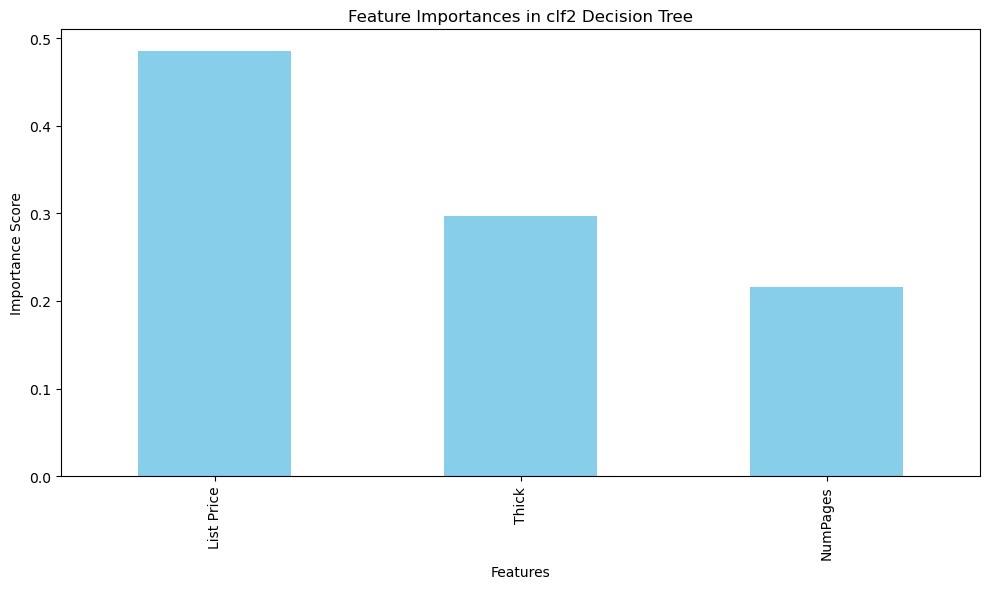

Feature Importances for clf2:
List Price    0.485974
Thick         0.297490
NumPages      0.216537
dtype: float64


In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Access the feature importances and feature names
feature_importances_clf2 = pd.Series(clf2.feature_importances_, index=clf2.feature_names_in_)

# Sort the feature importances
feature_importances_clf2 = feature_importances_clf2.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances_clf2.plot(kind='bar', color='skyblue')
plt.title('Feature Importances in clf2 Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

# Report the feature importances
print("Feature Importances for clf2:")
print(feature_importances_clf2)


### 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences<br>

In linear regression models, coefficients represent the exact quantitative relationship between each predictor and the target variable, indicating how much the dependent variable is expected to increase or decrease with a one-unit change in the predictor while holding other variables constant. This direct and specific interpretation allows for clear understanding of each variable's impact on the outcome. In contrast, feature importances in decision trees reflect the relative contribution of each feature to the model's predictive power based on criteria like impurity reduction but do not provide explicit information about the direction or magnitude of the effect, making them less straightforward to interpret compared to linear regression coefficients.

### 10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br>

Yes

### **Summary of ChatBot Interactions for Homework Assignment**

1. Understanding Classification Decision Trees

- User Request:

Asked for a description of the type of problem a Classification Decision Tree addresses.
Requested examples of real-world applications.
Sought clarification on the difference between predictions made by Classification Decision Trees and Multiple Linear Regression.
- Assistant Response:

Explained that Classification Decision Trees are used for supervised classification problems where the goal is to predict categorical outcomes.
Provided real-world applications such as medical diagnosis, fraud detection, customer segmentation, credit scoring, spam detection, employee attrition prediction, and disease outbreak prediction.
Highlighted key differences between Classification Decision Trees and Multiple Linear Regression:
Output Type: Trees predict categorical labels; regression predicts continuous values.
Decision Process: Trees use if-else conditions; regression uses a mathematical equation.
Interpretability: Trees are visually interpretable; regression coefficients show feature impact.
Handling Non-Linearity: Trees can capture non-linear relationships; regression assumes linearity.
2. Exploring Metrics in Real-World Scenarios

- User Request:

Wanted to explore appropriate real-world applications for metrics: Accuracy, Sensitivity, Specificity, and Precision.
Asked for explanations and rationales for each.
- Assistant Response:

Accuracy: Suitable for balanced class distributions where all errors have similar costs; example given was quality control in manufacturing.
Sensitivity: Important when missing positive cases has severe consequences; example was medical disease screening.
Specificity: Crucial when false positives lead to unnecessary actions; example was confirmatory medical testing.
Precision: Essential when the cost of false positives is high; example was spam email filtering.
Provided concise explanations for each metric's application and importance in the given scenarios.
3. Exploratory Data Analysis on Amazon Books Dataset

- User Request:

Asked to perform initial EDA on the Amazon Books dataset after specific preprocessing steps:
Remove certain columns.
Drop rows with NaN values.
Set data types for specific columns.
Provided guidance with import statements and the dataset URL.
- Assistant Response:

Demonstrated data preprocessing steps using pandas:
Dropped specified columns.
Removed rows with missing values.
Converted data types accordingly.
Conducted EDA by:
Displaying the first few rows.
Providing dataset information and summary statistics.
Analyzing categorical variables and distributions.
Discussed potential visualizations (e.g., histograms, boxplots) for further insights.
4. Addressing SettingWithCopyWarning

- User Issue:

Encountered SettingWithCopyWarning messages during data preprocessing.
- Assistant Response:

Explained that the warnings occur due to pandas' handling of copies versus views.
Suggested solutions:
Use .copy() method to create an explicit copy of the DataFrame.
Use .loc for assignments to ensure modifications are applied correctly.
Provided corrected code to eliminate the warnings and ensure proper data manipulation.
5. Building and Visualizing Decision Trees

- User Request:

Asked to create an 80/20 train-test split of the dataset.
Wanted to fit a DecisionTreeClassifier model using only List Price to predict Hard_or_Paper with max_depth=2.
Requested explanations for specific code steps.
Asked to visualize the decision tree and explain predictions.
- Assistant Response:

Provided code to split the data using train_test_split.
Explained code steps:
Converted Hard_or_Paper into a binary target variable y.
Selected List Price as the predictor variable X.
Trained the decision tree classifier and visualized it using tree.plot_tree.
Explained how the model makes predictions based on List Price thresholds depicted in the tree.
6. Expanding the Decision Tree Model

- User Request:

Wanted to repeat the problem with new specifications:
Use NumPages, Thick, and List Price as predictors.
Set max_depth to 4.
Asked for full code and explanations of how predictions are made.
- Assistant Response:

Provided the complete code to train the new decision tree (clf2) with the specified features and depth.
Visualized the decision tree and explained:
How multiple features are used at different nodes to make split decisions.
The increased complexity allows the model to capture more patterns.
Described the prediction process by traversing the tree based on feature values.
7. Evaluating Models with Confusion Matrices and Metrics

- User Request:

Asked to create confusion matrices for both clf and clf2 using the test data.
Requested reporting of sensitivity, specificity, and accuracy for each model.
- Assistant Response:

Provided code to:
Make predictions on the test set using both models.
Generate confusion matrices using confusion_matrix and ConfusionMatrixDisplay.
Calculate sensitivity, specificity, and accuracy using custom functions.
Reported the metrics for each model.
Interpreted the results, noting improvements in clf2 due to additional features and model depth.
8. Explaining Differences in Confusion Matrices

- User Request:

Wanted an explanation of differences between two confusion matrices when using clf with different feature sets.
Asked why the earlier confusion matrices were better.
- Assistant Response:

Explained that applying clf (trained on List Price only) to data with different features (NumPages, Thick, List Price) causes inconsistencies.
Highlighted that the mismatch leads to inaccurate predictions.
Emphasized that the earlier confusion matrices were better because each model was evaluated using the features it was trained on, ensuring valid results.
9. Visualizing Feature Importances

- User Request:

Asked how to visualize feature importances for scikit-learn decision trees.
Wanted to apply this to clf2 and report which predictor is most important.
- Assistant Response:

Guided on accessing and visualizing feature importances using .feature_importances_ and .feature_names_in_.
Provided code to create a bar chart displaying feature importances.
Reported that List Price was the most important predictor in clf2.
Explained how feature importances reflect the relative contribution of each feature to the model.
10. Comparing Interpretations of Linear Regression Coefficients and Decision Tree Feature Importances

- User Request:

Asked for a brief description of the differences in interpreting coefficients in linear regression versus feature importances in decision trees.
- Assistant Response:

Explained that linear regression coefficients provide direct, quantitative relationships between predictors and the target variable, indicating the exact change in the outcome for a unit change in the predictor.
Noted that feature importances in decision trees indicate the relative contribution of features to the model's predictive power but do not specify the direction or magnitude of the effect.
Highlighted that interpreting feature importances is less straightforward than interpreting regression coefficients.